In [4]:
import pandas
import torch

data = pandas.read_csv('../C_Data.csv')
length = len(data['y1'])
s1 = torch.tensor(data['y1']).reshape((length,1))
s2 = torch.tensor(data['y2']).reshape((length,1))
s3 = torch.tensor(data['y3']).reshape((length,1))
# s1 = torch.tensor(data['Number of reported results']).reshape((356,1))
# s2 = torch.tensor(data['Number in hard mode']).reshape((356,1))
# s3 = torch.tensor(data['vowel']).reshape((356,1))
# s4 = torch.tensor(data['overlap']).reshape((356,1))
# s5 = torch.tensor(data['freq']).reshape((356,1))
s4 = torch.tensor(data['ratio']).reshape((length,1))

a1 = torch.tensor(data['mu']).reshape((length,1))
a2 = torch.tensor(data['sigma']).reshape((length,1))

x = torch.cat((s1,s2,s3,s4),1).to(torch.float32).to('cuda')
y = torch.cat((a1,a2),1).to(torch.float32).to('cuda')

In [5]:
import torch

nn2 = 10
net1 = torch.nn.Sequential(
    torch.nn.Linear(4, nn2),
    torch.nn.ReLU(),
    torch.nn.Linear(nn2, 2),
    torch.nn.ReLU(),
).to('cuda')


In [6]:
optimizer = torch.optim.SGD(net1.parameters(), lr=0.01)
loss_function = torch.nn.MSELoss()
for epoch in range(100000):
   y_pred = net1(x)
   loss = loss_function(y_pred, y)
   print('epoch: ', epoch,' loss: ', loss.item())
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

epoch:  0  loss:  8.69539737701416
epoch:  1  loss:  8.40599250793457
epoch:  2  loss:  8.12057113647461
epoch:  3  loss:  7.835956573486328
epoch:  4  loss:  7.555186748504639
epoch:  5  loss:  7.2845377922058105
epoch:  6  loss:  7.023456573486328
epoch:  7  loss:  6.772526741027832
epoch:  8  loss:  6.529905796051025
epoch:  9  loss:  6.2926154136657715
epoch:  10  loss:  6.0641303062438965
epoch:  11  loss:  5.843928337097168
epoch:  12  loss:  5.631633758544922
epoch:  13  loss:  5.4267897605896
epoch:  14  loss:  5.229027271270752
epoch:  15  loss:  5.038069725036621
epoch:  16  loss:  4.853699684143066
epoch:  17  loss:  4.675799369812012
epoch:  18  loss:  4.504231929779053
epoch:  19  loss:  4.338773250579834
epoch:  20  loss:  4.1792473793029785
epoch:  21  loss:  4.02559757232666
epoch:  22  loss:  3.87764310836792
epoch:  23  loss:  3.7352871894836426
epoch:  24  loss:  3.598552703857422
epoch:  25  loss:  3.4672460556030273
epoch:  26  loss:  3.3412601947784424
epoch:  27 

In [63]:
test_data = pandas.read_csv('../C_TestData.csv')

length = len(test_data['y1'])
s1 = torch.tensor(test_data['y1']).reshape((length,1))
s2 = torch.tensor(test_data['y2']).reshape((length,1))
s3 = torch.tensor(test_data['y3']).reshape((length,1))

a1 = torch.tensor(test_data['mu']).reshape((length,1))
a2 = torch.tensor(test_data['sigma']).reshape((length,1))

x = torch.cat((s1,s2,s3),1).to(torch.float32).to('cuda')
y = torch.cat((a1,a2),1).to(torch.float32).to('cuda')



y_pred = net1(x)

loss = loss_function(y_pred, y)
print(' loss: ', loss.item())

 loss:  0.06056101247668266


In [7]:
k1 = torch.tensor([-1.664347187,4.116637207,-2.097169674,0.0969]).to('cuda')
net1(k1)

tensor([5.2026, 1.4668], device='cuda:0', grad_fn=<ReluBackward0>)

In [8]:
torch.save(net1, './fullmodel2.pt')

array([ 0.,  6., 23., 35., 24.,  7.,  1.])

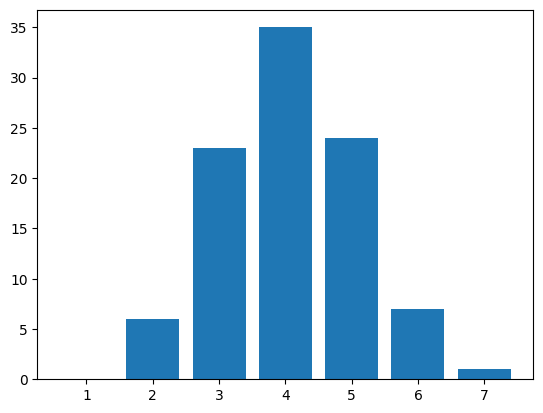

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

dist = []
for x in range(1,8):
    dist.append(normal_dist(x,4.033616,1.110456))

npa = np.array(dist)



plt.bar(np.array([1,2,3,4,5,6,7]), np.floor(npa/npa.sum()*100))
np.floor(npa/npa.sum()*100)

# qs = [x for x in range(-100,101,5)]
# for q in qs:
#     nd = normal_dist(q/40,0,1)
#     print(f'[{q/40}, {nd}],')